In [2]:
import math
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
    return 3*x**2 - 4*x +5
    

In [4]:
f(3.0)

20.0

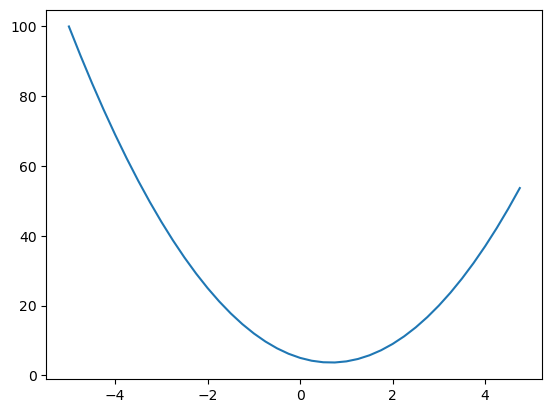

In [5]:
xs= np.arange(-5,5, 0.25)
ys=f(xs)
plt.plot(xs,ys)
plt.show()

In [6]:
h=0.00000001
x=2/3
(f(x+h) -f(x))/h

0.0

In [7]:
# complex
a=2.0
b=-3.0
c=10.0
d=a*b +c
print(d)

4.0


In [8]:
h=0.0001

a=2.0
b=-3.0
c=10.0
d1=a*b +c
a+=h
d2=a*b +c
print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [112]:
class Value:
    
    def __init__(self,data,_children=(),_op='',label=""):
        self.data=data
        self.grad=0.0
        self._backward = lambda: None
        self._prev=set(_children)
        self._op=_op
        self.label = label
    
    def __repr__(self):# this basically is used as a return in def but now for class
        return f"Value(data={self.data}"

    def __add__(self,other):
        out=Value(self.data+other.data,(self,other),"+")
        def _backward():
            self.grad+=1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward=_backward
        return out
    
    def __mul__(self,other):
        out=Value(self.data*other.data,(self,other),"*")
        def _backward():
            self.grad += other.data*out.grad
            other.grad += self.data *out.grad
        out._backward=_backward
        return out
    
    def tanh(self):
        x=self.data
        t=(math.exp(2*x)-1)/(math.exp(2*x) +1 )
        out=Value(t,(self,), 'tanh')

        def _backward():
            self.grad+=(1-t**2) * out.grad
        out._backward=_backward
        return out
    
    def backward(self):
        topo=[]
        visited=set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad=1.0
        for node in reversed(topo):
            node._backward()


a=Value(2.0,label="a")
b=Value(-3.0,label="b")
c=Value(10.0,label="c")
e=a*b ; e.label="e"

d=e +c; d.label="d"
f=Value(-2.0,label="f")
L=d*f ; L.label="L"
L

Value(data=-8.0

In [76]:
from graphviz import Digraph

def trace(root):
    #builds a set of all nodes and edges in a graph 
    nodes, edges =set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={'rankdir':'LR'}) #LR =Left to right
    nodes, edges=trace(root)
    for n in nodes:
        uid=str(id(n))
        # for any value in the graph , create a rectangular ('record') node for it
        dot.node(name=uid,  label="{%s | data %.4f | grad %.4f }" % (n.label,n.data,n.grad),shape="record")
        if n._op:
            #if this value is a result of the same operation , create an op node for it
            dot.node(name= uid+ n._op,label= n._op)
            # and connect this node to it 
            dot.edge(uid + n._op,uid)
    for n1,n2 in edges:
        #connect n1 to the op node of n2
        dot.edge(str(id(n1)),str(id(n2))+ n2._op)

    return dot

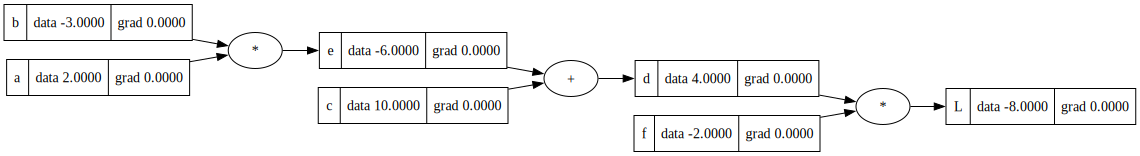

In [77]:
draw_dot(L)

In [27]:
a.data += 0.01 * a.grad
b.grad += 0.01*b.grad
c.grad += 0.01 * c.grad
f.grad += 0.01 * f.grad

e=a*b 
d=e + c
L=d*f 
L.data

-6.919999999999998

In [23]:
a.grad=-3.0 *-2.0
b.grad=2.0*-2.0

In [12]:
c.grad=-2.0
e.grad=-2.0

In [13]:
L.grad=1.0
f.grad=4.0
d.grad=-2.0

In [18]:
def lol():
    h=0.001

    a=Value(2.0,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b ; e.label="e"
    d=e +c; d.label="d"
    f=Value(-2.0,label="f")
    L=d*f ; L.label="L"
    L1=L.data

    a=Value(2.0,label="a")
    b=Value(-3.0,label="b")
    c=Value(10.0,label="c")
    e=a*b ; e.label="e"
    # e.data += h
    d=e +c; d.label="d"
    f=Value(-2.0,label="f")
    L=d*f ; L.label="L"
    L2=L.data
    print((L2-L1)/h)

lol()

0.0


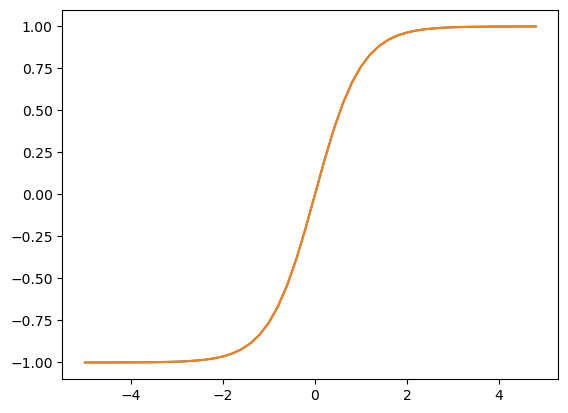

In [29]:
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2))); plt.grid();
plt.show()

In [108]:
# inputs x1,x2
x1=Value(2.0,label='x1')
x2=Value(0.0, label='x2')
# weights w1,w2
w1=Value(-3.0,label="w1")
w2=Value(1.0,label='w2')
# bias of the neuron
b=Value(6.8813735870195432, label='b')
# x1w1 +x2w2 +b
x1w1=x1*w1; x1w1.label="x1w1"
x2w2=x2*w2; x2w2.label='x2w2'
x1w1x2w2= x1w1+x2w2; x1w1x2w2.label="x1w1x2w2"
n=x1w1x2w2+b; n.label='n'
o=n.tanh(); o.label="o"


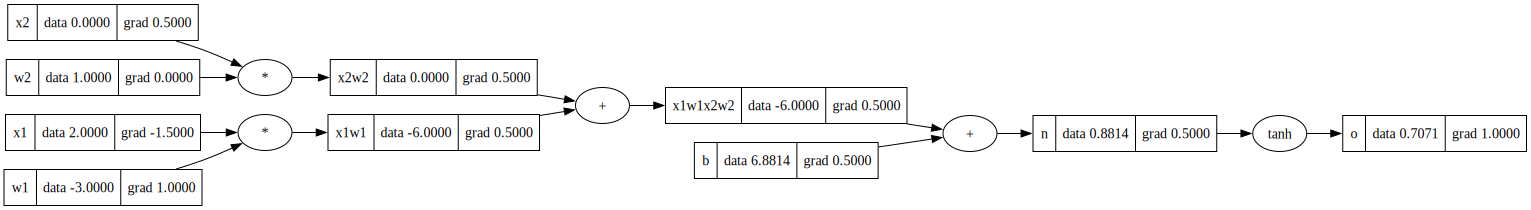

In [111]:
draw_dot(o)

In [110]:
o.backward()

In [101]:
# Topological sort
topo=[]
visited=set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=6.881373587019543,
 Value(data=-3.0,
 Value(data=2.0,
 Value(data=-6.0,
 Value(data=0.0,
 Value(data=1.0,
 Value(data=0.0,
 Value(data=-6.0,
 Value(data=0.8813735870195432,
 Value(data=0.7071067811865476]